# Python Project
## Melody Rios
### December 11, 2023

## Instructions
#### You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary will go the farthest with respect to each individual index within the cost_of_living.csv file. Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis (I am looking for data wrangling more than anything). 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data
#### I will be importing data for cost of living and salary data. I will then clean the data as needed. 

In [13]:
# Import Cost of Living Data
cost_of_living_df = pd.read_csv('cost_of_living.csv')
cost_of_living_df.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,NaN,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,NaN,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,NaN,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96


In [3]:
clean_cost_of_living_df = cost_of_living_df.drop(columns = ['Rank'])
clean_cost_of_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96


In [4]:
# Import Salaries 
ds_salaries_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
ds_salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


#### I will be selecting certain columns from the DS Salaries Data Frame to work with.

In [5]:
select_ds_salary_columns = ds_salaries_df[['title', 'basesalary']]
select_ds_salary_columns.head()

,title,basesalary
0,Product Manager,107000.0
1,Software Engineer,0.0
2,Product Manager,155000.0
3,Software Engineering Manager,157000.0
4,Software Engineer,0.0


#### I will narrow down to only work with data that involves the job titles of Data Scientist and Business Analyst.

In [6]:
selected_titles = select_ds_salary_columns[
    (select_ds_salary_columns['title'].isin(['Data Scientist', 'Business Analyst']))
]
selected_titles.head()

,title,basesalary
419,Data Scientist,162000.0
440,Data Scientist,165000.0
444,Data Scientist,0.0
454,Data Scientist,200000.0
495,Data Scientist,190000.0


#### Now, I want to find the average salary based on the job titles selected.

In [16]:
avg_selected_titles = selected_titles['basesalary'].mean()
print('The average salary for either a Data Scientist or Business Analyst role is:', 
      round(avg_selected_titles, 2))

The average salary for either a Data Scientist or Business Analyst role is: 129225.24


#### Below, we can see the average distribution of Base Salaries for the chosen roles. 

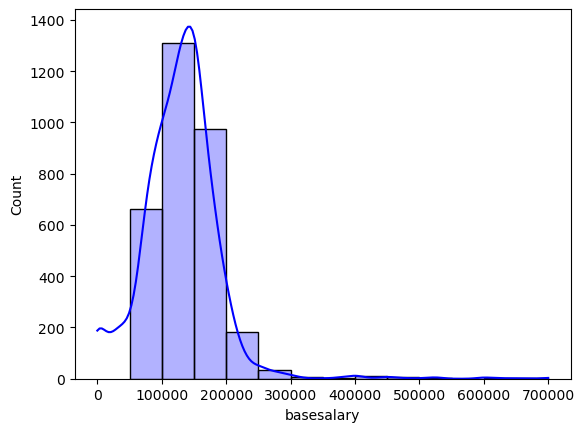

In [15]:
hist_chart = sns.histplot(selected_titles['basesalary'],
                        color = 'blue',
                        alpha = 0.30,
                        bins = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000,
                        600000, 650000, 700000],
                        kde = True)
plt.show()

#### Based on the data from where it was retrieved, https://www.numbeo.com/cost-of-living/cpi_explained.jsp, New York City is the baseline at 100%. I will use the average salary of $129,225.24 USD as my baseline moving forward and assume an index of 100% as well. 
#### I chose this and the roles because it's the most realistic to my situation once I graduate. 

#### Next, I will compare the following indexes across global locations:
#####    1. Cost of Living 
#####    2. Rent 
#####    3. Cost of Living Plus Rent 
#####    4. Groceries 
#####    5. Restaurant Price 
#####    6. Local Purchasing Power 

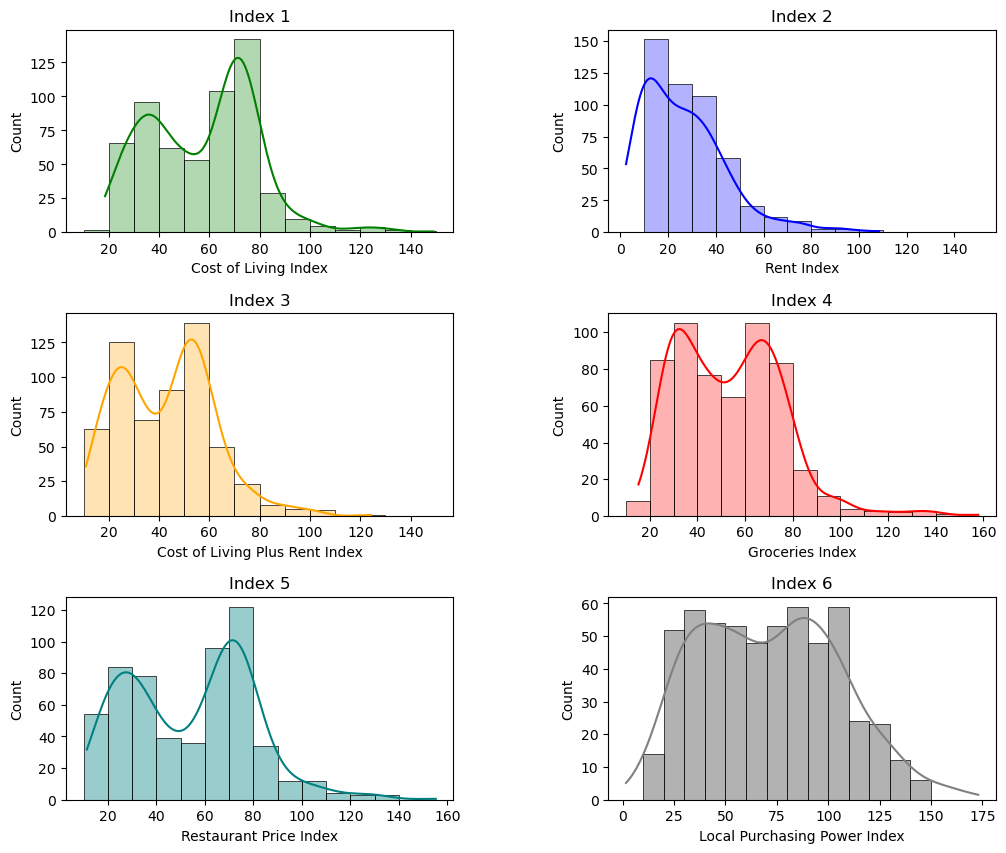

In [9]:
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# histogram bins
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

# first subplot (top-left)
plt.subplot(3, 2, 1)
sns.histplot(clean_cost_of_living_df['Cost of Living Index'], bins = bins, color = 'green', alpha = 0.3, edgecolor = 'black', linewidth = 0.5, kde = True)
plt.title('Index 1')

# second subplot (top-right)
plt.subplot(3, 2, 2)
# Repeat the process for the other subplots
sns.histplot(clean_cost_of_living_df['Rent Index'], bins = bins, color = 'blue', alpha = 0.3, edgecolor = 'black', linewidth = 0.5, kde = True)
plt.title('Index 2')

# third subplot (middle-left)
plt.subplot(3, 2, 3)
sns.histplot(clean_cost_of_living_df['Cost of Living Plus Rent Index'], bins = bins, color = 'orange', alpha = 0.3, edgecolor = 'black', linewidth = 0.5, kde = True)
plt.title('Index 3')

# fourth subplot (middle-right)
plt.subplot(3, 2, 4)
sns.histplot(clean_cost_of_living_df['Groceries Index'], bins = bins, color = 'red', alpha = 0.3, edgecolor = 'black', linewidth = 0.5, kde = True)
plt.title('Index 4')

# fifth subplot (bottom-left)
plt.subplot(3, 2, 5)
sns.histplot(clean_cost_of_living_df['Restaurant Price Index'], bins = bins, color = 'teal', alpha = 0.4, edgecolor = 'black', linewidth = 0.5, kde = True)
plt.title('Index 5')

# sixth subplot (bottom-right)
plt.subplot(3, 2, 6)
sns.histplot(clean_cost_of_living_df['Local Purchasing Power Index'], bins = bins, color = 'grey', alpha = 0.6, edgecolor = 'black', linewidth = 0.5, kde = True)
plt.title('Index 6')

plt.show()

#### First, I wanted to show the various distributions for each index. I'll be taking the median of each index and using that to compare the base salary.

## Cost of Living Index

In [17]:
median_col = clean_cost_of_living_df['Cost of Living Index'].median()
print('The median for the Cost of Living Index is:', round(median_col, 1))

The median for the Cost of Living Index is: 62.4


#### We will use the median to convert the percentage to USD based on my base salary of $129,225.25.

In [18]:
#convert salary to USD based on our 129,225.25 salary
base_amount = 129225.24
percentage = 62.4

amount = (percentage / 100) * base_amount
print('The salary required for a comfortable standard of living, determined by the median cost of living:', round(amount, 2))

The salary required for a comfortable standard of living, determined by the median cost of living: 80636.55


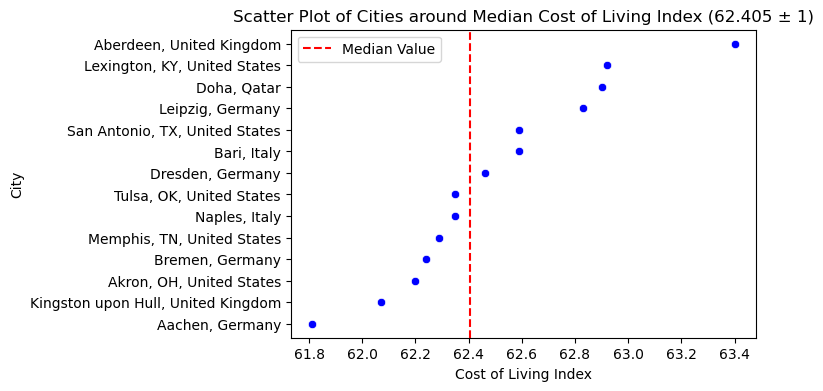

In [27]:
median_value = clean_cost_of_living_df['Cost of Living Index'].median()
tolerance = 1  

median_city_df = clean_cost_of_living_df.loc[
    (clean_cost_of_living_df['Cost of Living Index'] >= median_value - tolerance) &
    (clean_cost_of_living_df['Cost of Living Index'] <= median_value + tolerance),
    ['City', 'Cost of Living Index']]

# scatter plot - Median Cost of Living Index
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Cost of Living Index', y='City', data=median_city_df, color='blue')

# vertical line at the median value
plt.axvline(x=median_value, color='red', linestyle='--', label='Median Value')

plt.title(f'Scatter Plot of Cities around Median Cost of Living Index ({median_value} ± {tolerance})')
plt.legend()
plt.show()


#### Above, we can see several cities aligning with our median value. As we approach this benchmark, Tulsa, Oklahoma, is the most fitting choice based on the Cost of Living Index.

## Rent Index

In [20]:
median_rent = clean_cost_of_living_df['Rent Index'].median()
print('The median for the Rent Index is:', round(median_rent, 1))

The median for the Rent Index is: 23.3


In [21]:
#convert salary to USD based on our 129,225.25 salary
base_amount = 129225.24
percentage = 23.3

amount = (percentage / 100) * base_amount
print('The salary required for a comfortable standard of living, determined by the median Rent Index:', round(amount, 2))

The salary required for a comfortable standard of living, determined by the median Rent Index: 30109.48


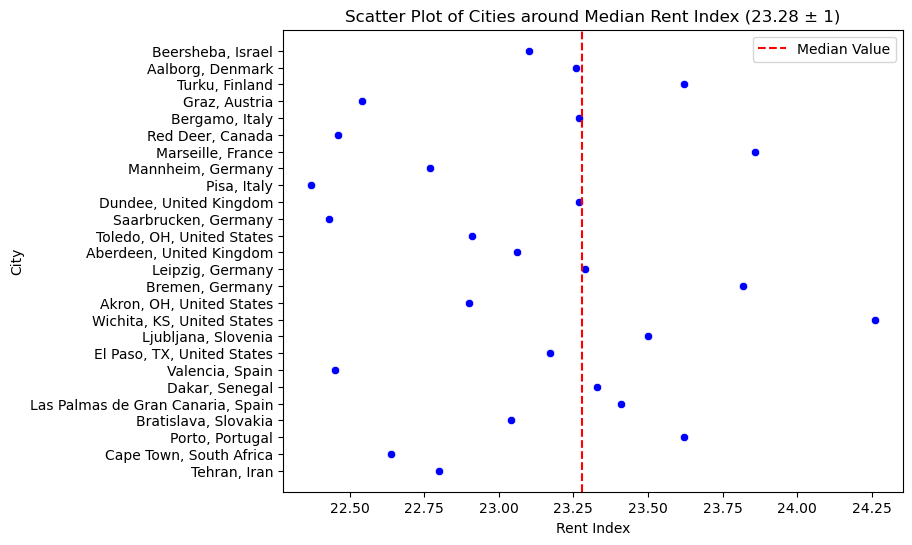

In [26]:
tolerance = 1  

median_rent_df = clean_cost_of_living_df.loc[
    (clean_cost_of_living_df['Rent Index'] >= median_rent - tolerance) &
    (clean_cost_of_living_df['Rent Index'] <= median_rent + tolerance),
    ['City', 'Rent Index']]

# scatter plot - Median Rent Index
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Rent Index', y = 'City', data = median_rent_df, color ='blue')

# vertical line at the median value
plt.axvline(x = median_rent, color = 'red', linestyle = '--', label = 'Median Value')

plt.title(f'Scatter Plot of Cities around Median Rent Index ({median_rent} ± {tolerance})')
plt.legend()
plt.show()


#### More cities align with our median value for the Rent Index. As we approach this benchmark, Dundee, United Kingdom is the most fitting choice based on the Rent Index.

## Cost of Living Plust Rent

In [23]:
median_col_rent = clean_cost_of_living_df['Cost of Living Plus Rent Index'].median()
print('The median for the Cost of Living Plus Rent Index is:', round(median_col_rent, 1))

The median for the Cost of Living Plus Rent Index is: 45.0


In [24]:
#convert salary to USD based on our 129,225.25 salary
base_amount = 129225.24
percentage = 45.0

amount = (percentage / 100) * base_amount
print("The salary required for a comfortable standard of living in various cities, determined by the median \n cost of living plus rent:", round(amount, 2))


The salary required for a comfortable standard of living in various cities, determined by the median 
 cost of living plus rent: 58151.36


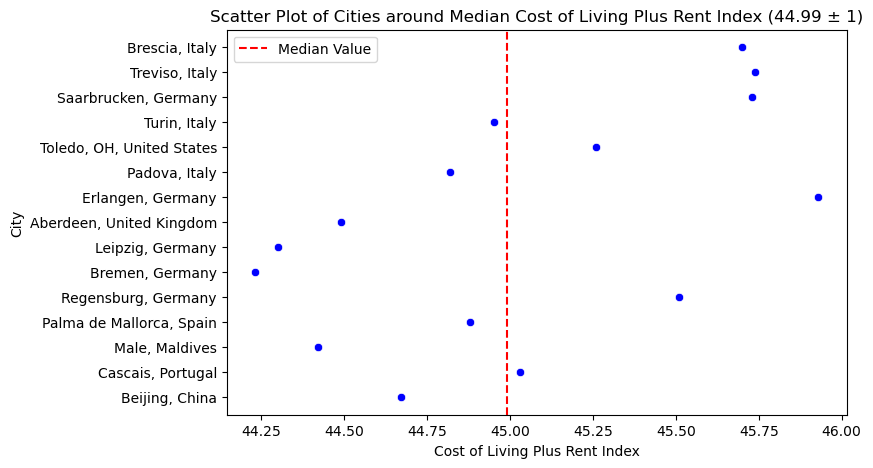

In [28]:
tolerance = 1  

median_col_rent_df = clean_cost_of_living_df.loc[
    (clean_cost_of_living_df['Cost of Living Plus Rent Index'] >= median_col_rent - tolerance) &
    (clean_cost_of_living_df['Cost of Living Plus Rent Index'] <= median_col_rent + tolerance),
    ['City', 'Cost of Living Plus Rent Index']]

# scatter plot - Median Cost of Living plus Rent Index
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'Cost of Living Plus Rent Index', y = 'City', data = median_col_rent_df, color ='blue')

# vertical line at the median value
plt.axvline(x = median_col_rent, color = 'red', linestyle = '--', label = 'Median Value')

plt.title(f'Scatter Plot of Cities around Median Cost of Living Plus Rent Index ({median_col_rent} ± {tolerance})')
plt.legend()
plt.show()

#### The best choice for city based on the Median Cost of Living Plus Rent is Turin, Italy. 

## Groceries Index

In [29]:
median_groceries = clean_cost_of_living_df['Groceries Index'].median()
print('The median for Groceries Index is:', round(median_groceries, 1))

The median for Groceries Index is: 52.7


In [30]:
#convert salary to USD based on our 129,225.25 salary
base_amount = 129225.24
percentage = 52.7

amount = (percentage / 100) * base_amount
print("The salary required for a comfortable standard of living in various cities, determined by the median \n Groceries Index:", round(amount, 2))


The salary required for a comfortable standard of living in various cities, determined by the median 
 Groceries Index: 68101.7


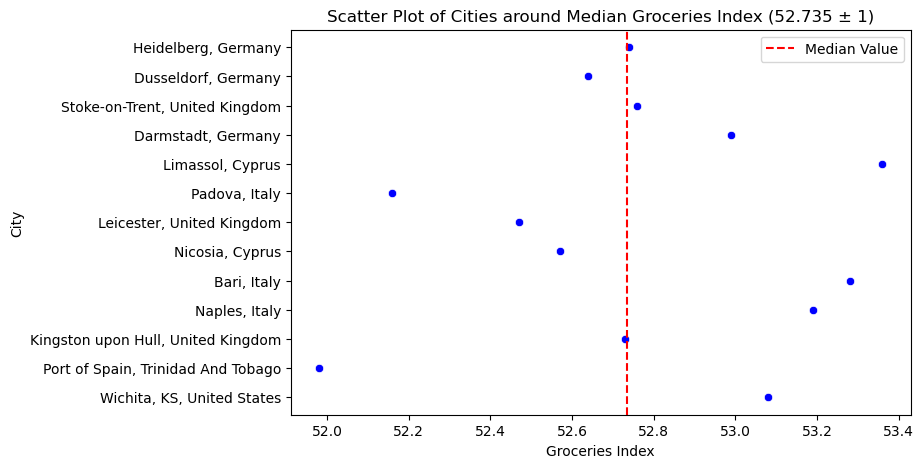

In [32]:
tolerance = 1  

median_groceries_df = clean_cost_of_living_df.loc[
    (clean_cost_of_living_df['Groceries Index'] >= median_groceries - tolerance) &
    (clean_cost_of_living_df['Groceries Index'] <= median_groceries + tolerance),
    ['City', 'Groceries Index']]

# scatter plot - Median Groceries Index
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'Groceries Index', y = 'City', data = median_groceries_df, color ='blue')

# vertical line at the median value
plt.axvline(x = median_groceries, color = 'red', linestyle = '--', label = 'Median Value')

plt.title(f'Scatter Plot of Cities around Median Groceries Index ({median_groceries} ± {tolerance})')
plt.legend()
plt.show()

#### The best choice for city based on the median Groceries Index is Kingston upon Hull, United Kingdom. 

## Restaurant Price Index

In [33]:
median_restaurant = clean_cost_of_living_df['Restaurant Price Index'].median()
print('The median for Restaurant Price Index is:', round(median_restaurant, 1))

The median for Restaurant Price Index is: 59.1


In [34]:
#convert salary to USD based on our 129,225.25 salary
base_amount = 129225.24
percentage = 59.1

amount = (percentage / 100) * base_amount
print("The salary required for a comfortable standard of living in various cities, determined by the median \n of the Restaurant Price Index:", round(amount, 2))


The salary required for a comfortable standard of living in various cities, determined by the median 
 of the Restaurant Price Index: 76372.12


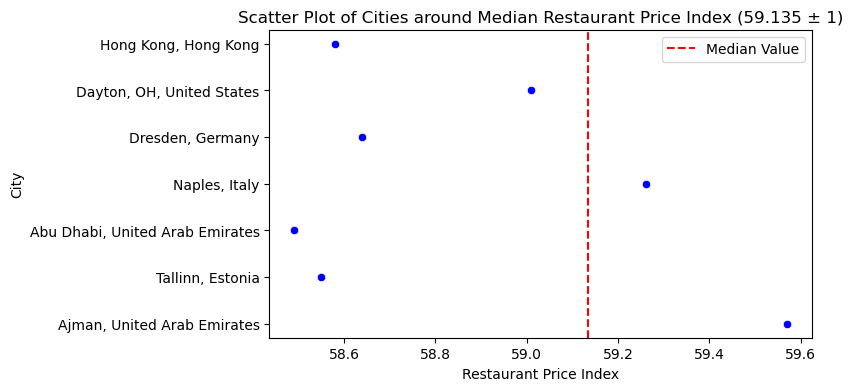

In [35]:
tolerance = 1  

median_restaurant_df = clean_cost_of_living_df.loc[
    (clean_cost_of_living_df['Restaurant Price Index'] >= median_restaurant - tolerance) &
    (clean_cost_of_living_df['Restaurant Price Index'] <= median_restaurant + tolerance),
    ['City', 'Restaurant Price Index']]

# scatter plot - Restaurant Price Index
plt.figure(figsize = (7, 4))
sns.scatterplot(x = 'Restaurant Price Index', y = 'City', data = median_restaurant_df, color ='blue')

# vertical line at the median value
plt.axvline(x = median_restaurant, color = 'red', linestyle = '--', label = 'Median Value')

plt.title(f'Scatter Plot of Cities around Median Restaurant Price Index ({median_restaurant} ± {tolerance})')
plt.legend()
plt.show()

#### This visual certainly surprised me in that there are not that many cities close to the Median Value. Though the closest city based on our Median Restaurant Price Index is Dayton, Ohio.

## Local Purchasing Power Index

In [36]:
median_purchase = clean_cost_of_living_df['Local Purchasing Power Index'].median()
print('The median for Local Purchasing Power Index is:', round(median_purchase, 1))

The median for Local Purchasing Power Index is: 70.9


In [37]:
#convert salary to USD based on our 129,225.25 salary
base_amount = 129225.24
percentage = 70.9

amount = (percentage / 100) * base_amount
print("The salary required for a comfortable standard of living in various cities, determined by the median \n of the Local Purchasing Power Index:", round(amount, 2))


The salary required for a comfortable standard of living in various cities, determined by the median 
 of the Local Purchasing Power Index: 91620.7


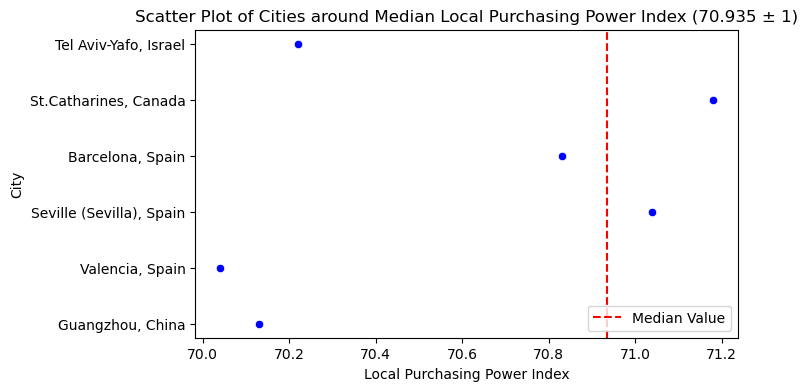

In [53]:
# median_restaurant = clean_cost_of_living_df['Restaurant Price Index'].median()
tolerance = 1  

median_purchase_df = clean_cost_of_living_df.loc[
    (clean_cost_of_living_df['Local Purchasing Power Index'] >= median_purchase - tolerance) &
    (clean_cost_of_living_df['Local Purchasing Power Index'] <= median_purchase + tolerance),
    ['City', 'Local Purchasing Power Index']]

# scatter plot - Local Purchasing Power Index
plt.figure(figsize = (7, 4))
sns.scatterplot(x = 'Local Purchasing Power Index', y = 'City', data = median_purchase_df, color ='blue')

# vertical line at the median value
plt.axvline(x = median_purchase, color = 'red', linestyle = '--', label = 'Median Value')

plt.title(f'Scatter Plot of Cities around Median Local Purchasing Power Index ({median_purchase} ± {tolerance})')
plt.legend(loc = 'lower right')
plt.show()

#### While not many cities offer substantial purchasing power based on the median value, Barcelona, Spain, stands out as the top choice in this regard.

## Summary
#### To summarize, I chose 6 cities where my base salary could go a long way based on the median of the selected indexes. 

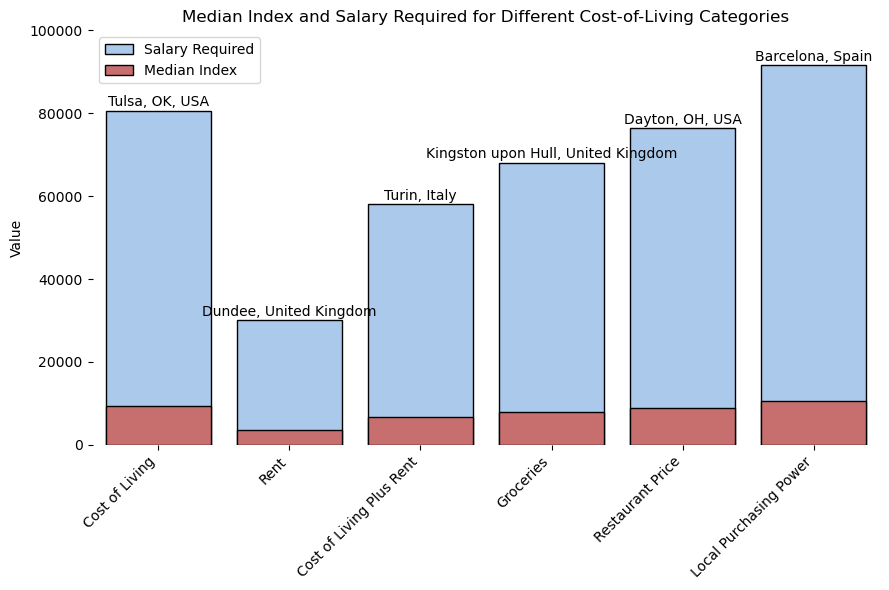

In [42]:
# create df for data to summarize
best_cities_df = {
    'Category': ['Cost of Living', 'Rent', 'Cost of Living Plus Rent', 'Groceries', 'Restaurant Price', 'Local Purchasing Power'],
    'Median Index': [62.4, 23.3, 45.0, 52.7, 59.1, 70.9],
    'Salary Required': [80636.55, 30109.48, 58151.36, 68101.7, 76372.12, 91620.7],
    'Best City': ['Tulsa, OK, USA', 'Dundee, United Kingdom', 'Turin, Italy', 'Kingston upon Hull, United Kingdom', 'Dayton, OH, USA', 'Barcelona, Spain']
}

median_data_df = pd.DataFrame(best_cities_df)
# print(median_data_df)

scaling_factor = 150  
median_data_df['Median Index'] = median_data_df['Median Index'] * scaling_factor

# size of chart
f, ax = plt.subplots(figsize = (9, 6))

# salary chart
sns.set_color_codes("pastel")
sns.barplot(x = "Category", y = "Salary Required", data = median_data_df,
            label = "Salary Required", color = "b", edgecolor = "black")

# median index chart
sns.set_color_codes("muted")
sns.barplot(x = "Category", y = "Median Index", data = median_data_df,
            label = "Median Index", color = "r", edgecolor = "black")

# labels, titles
ax.set_ylabel('Value')
ax.set_title('Median Index and Salary Required for Different Cost-of-Living Categories')
ax.legend(ncol = 1, loc = "best", frameon = True)
ax.set(ylim = (0, 100000), xlabel = "")
sns.despine(left = True, bottom = True)

for index, row in median_data_df.iterrows():
    ax.text(index, row['Salary Required'] + 1000, row['Best City'], ha='center')

plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

#### We can see that the Median Index exhibits relatively minor variations across the different indexes, with the most significant fluctuation occurring in the Rent Index. If I were to select a single city based on the presented data, Dundee, United Kingdom, would be my preferred choice.